In [6]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import os
from time import perf_counter
import cv2

# To load data
loaded_data = np.load(os.path.join(os.getcwd(), "sim_data.npz"), allow_pickle=True)
data_stack_np = loaded_data["data_stack"]

# data_stack_np[timestep, column (agents, dialect_groups)]


In [2]:
print(data_stack_np.shape)

(1238, 2)


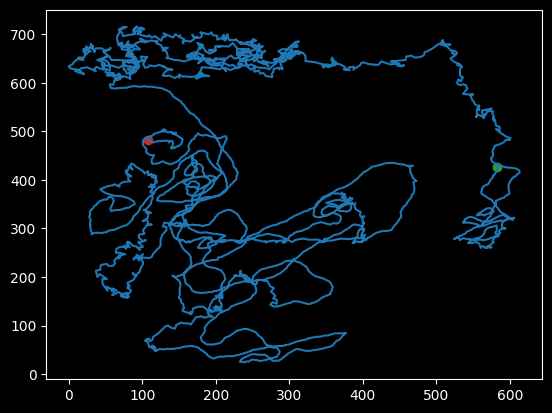

In [7]:

# data_stack_np[step, column(agent object, dialect clusters)][agent_idx]
agent = data_stack_np[0, 0][3]


agent_id = agent.id
y = []; x = []
for step in data_stack_np:
    agent = [agent for agent in step[0] if agent.id == agent_id]
    if len(agent) > 0: 
        agent = agent[0]
        x.append(agent.position[0])
        y.append(agent.position[1])
    else: break

li = list(zip(x, y))
img = cv2.imread(os.path.join(os.getcwd(), "environment.png"))
img = cv2.resize(img, (1280, 720), interpolation = cv2.INTER_AREA)
#plt.imshow(img, origin='upper')

#plt.style.use('dark_background')
plt.plot(*zip(*li), color='tab:blue')
plt.scatter(x[0], y[0], color='tab:green')
plt.scatter(x[-1], y[-1], color='tab:red')
plt.savefig("agent-path.png", dpi=500)
plt.show()
plt.close()

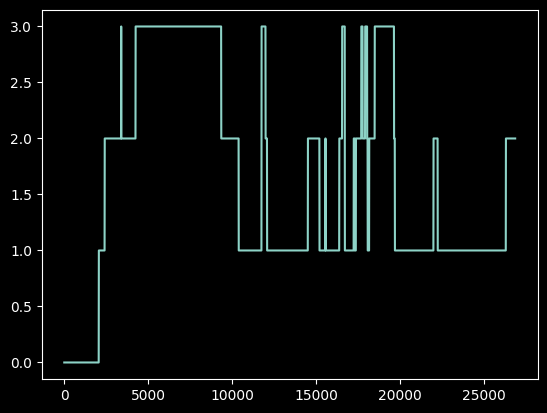

In [3]:
dialect_clusters = [np.max(step)+1 for step in data_stack_np[:,1]]
time = np.arange(len(dialect_clusters))*10
plt.plot(time, dialect_clusters)
plt.show()

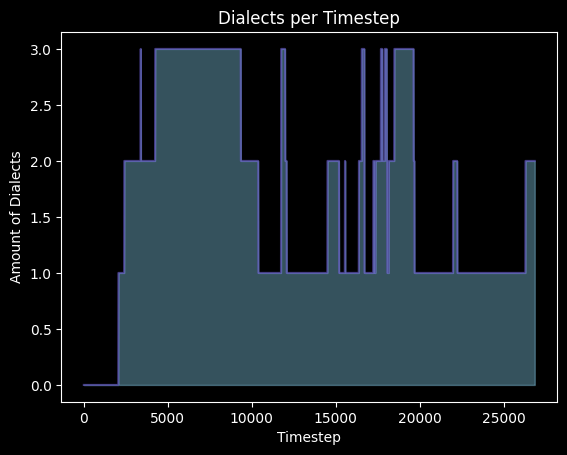

In [4]:
plt.fill_between(time, dialect_clusters, color='skyblue', alpha=0.4)
plt.plot(time, dialect_clusters, color='Slateblue', alpha=0.6)
plt.xlabel('Timestep')
plt.ylabel('Amount of Dialects')
plt.title('Dialects per Timestep')
plt.savefig("open-env-clusters-over-time.png", dpi=500)
plt.show()


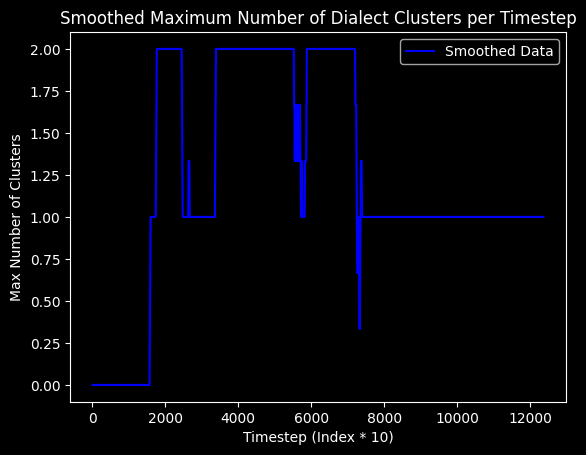

In [29]:

# Apply a moving average with a window size of 3
window_size = 3
smoothed_values = np.convolve(dialect_clusters, np.ones(window_size)/window_size, mode='valid')

# Adjust x values to match the length of the smoothed data
x_values_smooth = time[:len(smoothed_values)] + (window_size//2) * 10  # Center the moving average

# Plot
#plt.plot(time, dialect_clusters, label='Original Data', color='lightgray', linestyle='--')
plt.plot(x_values_smooth, smoothed_values, label='Smoothed Data', color='blue')
plt.xlabel('Timestep (Index * 10)')
plt.ylabel('Max Number of Clusters')
plt.title('Smoothed Maximum Number of Dialect Clusters per Timestep')
plt.legend()
plt.show()

